Today we will target the problem of evaluating performance.

# Introduction.

Experiment:Let's play a one minute chess game. I want to know who has the best performance.

In [33]:
from IPython.display import Image

 What have we measured with our experiment?

    a)We measured talent.
    
    b)We need to play more games to describe a player's chess talent.
    
    c)Our game is independent of talent, the output is random.
    
    
    

In a game (a tournament for us) we play 10 rounds of chess, and because Nathan and I play at the same level, I am likely to end up winning 5/10. 

###### Performance.
How well a player did on a particular game. We expect performance to vary (tiredness, fluctuation of enthusiasm)...

##### Skill.
Average performance.

    Axiom 1: 
    Each player has a skill value, represented by a continuous variable.


Below I simulate my performance, every time I play in a tournament I got a value for performance (axis X) and in the Y-axis counts how many time I got that performance in a 3 years range.

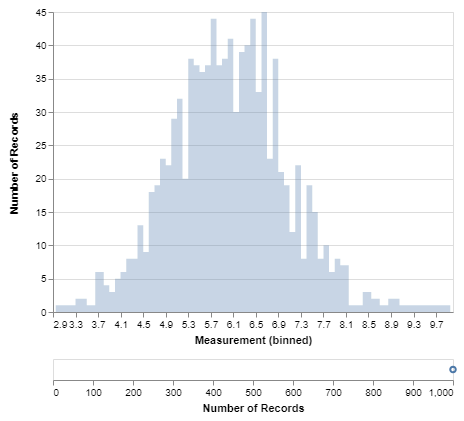

In [5]:
import pandas as pd
import altair as alt
import numpy as np
#np.random.seed(42)
alt.renderers.enable('notebook')
# Generating Data
values = 1000
source = pd.DataFrame({'Trial': np.random.normal(6, 1, values)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skills',
    value_name='Measurement'
)
interval = alt.selection_interval(encodings=['x'])

ats = alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step',
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
   ).add_selection(
    interval
)

hist = alt.Chart(source).mark_point().encode(
alt.X('count()', scale=alt.Scale(domain=[0,values]))).transform_filter(interval)

ats & hist

Math people always likes to generalize and work with infinite numbers, even if that is just an approximation to the real world. We substitute that probability distribution by a normal distribution  with equation $n(x;\mu,\sigma)=\frac{1}{(2\pi)^{1/2} \sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$ where $\mu$ = mean, $\sigma$=  standard deviation.


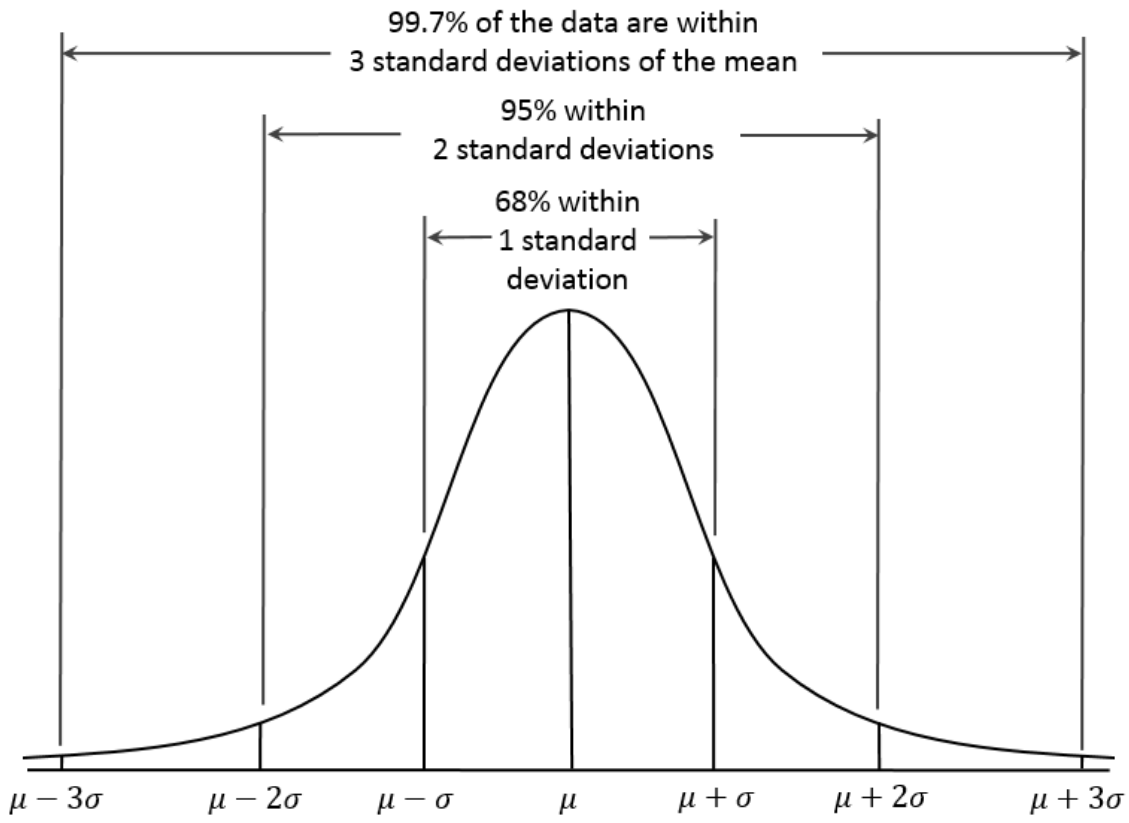

In [34]:
Image('img/normal.png')


Why?
mostly because of the central limit theorem which I won't explain. Instead let me just show you an experiment  from wikipedia to convince you that in real life this approximation is feasible. Let's assume that we can only win or lose but not drawn. Then in a tournament we have 10 rounds. 

https://upload.wikimedia.org/wikipedia/commons/transcoded/d/dc/Galton_box.webm/Galton_box.webm.480p.vp9.webm

Reminder  $n(x;\mu,\sigma)=\frac{1}{(2\pi)^{1/2} \sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$.
    
    The mean is the middle value in a Bell curve (Gaussian distribution).

    The standard deviation measures the shape of the Bell curve.
    


Our target is to find the value of the mean, since random positive measurements may be due to luck. 

    a)We measured talent.
    
    b)We need to play more games to describe a player's average performance (skill).
    
    c)Our game is independent of talent, the output is random.
    
    
    

Let's see how well we understand a Gaussian distribution:

Sport Illustrated Jinx. An athlete whose picture appears on the cover of the magazine is doomed to perform poorly the following season.

    'an athlete who gets to be on the cover of Sports Illustrated must have performed excepinally well in the preceding season, probably with the assistance of luck, and luck is fickle'

Rewards for improvement work better than punishments of mistakes. 
##### We tend to be nice to other people when they please us and nastey when they do not, we are statistically punished for being nice and rewarded for being nasty. (Daniel Kahneman)

###### "if the topic of regression (to the mean) comes up in a criminal or civil trial, the side that must explain refression to the jury will lose the case" David Freedman

###  ELO rating.

If we know the skills, how does our model updates after a game?

Real examples of tournament performance:

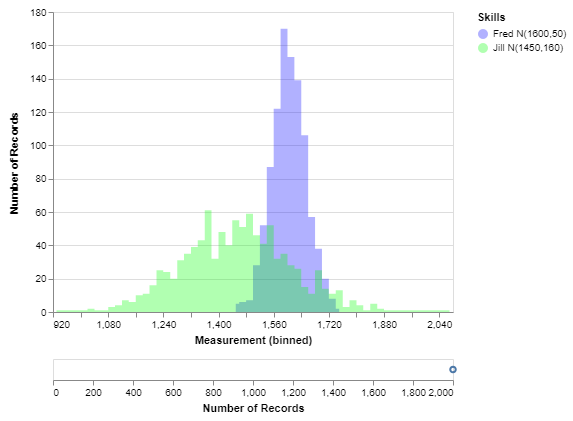

In [44]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({'Jill N(1450,160)': np.random.normal(1450, 160, 1000),
                   'Fred N(1600,50)': np.random.normal(1600, 50, 1000)})
#source = source.clip(0, 10)

# Tidying Data
sourced = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skills',
    value_name='Measurement'
)
interval = alt.selection_interval(encodings=['x'])
ats = alt.Chart(sourced).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Skills',
        scale=alt.Scale(range=['#0000ff','#00ff00'])
    )
).add_selection(
    interval
)

hist = alt.Chart(sourced).mark_point().encode(
alt.X('count()', scale=alt.Scale(domain=[0,2000]))
).transform_filter(interval)

ats & hist


    Who has higher skills? 

    who has more experience?

    who do we expect to win more often?

###### Stronger players are expected to win more often than weaker players



Probability that player one wins:
$CumGauss(\frac{P1skill-P2skill}{\sqrt{2}perfSD})$

Area under bell curve from $-\infty$ to $\frac{P1skill-P2skill}{\sqrt{2}perfSD}.$


###### ELO rating.
    The Elo rating system is a method for calculating the relative skill levels of players in zero-sum games such as chess. It is named after its creator Arpad Elo, a Hungarian-American physics professor

How is the Elo updated?

Let's consider Jill and Fred, we know that the probability of Jill to win is:
$JillAverageScore=CumGauss(\frac{JillSkill-FredSkill}{\sqrt{2}perfSD})$


In [45]:
import math
from scipy.stats import norm

JillSkill = 1450
JillSD = 160
FredSkill = 1600
FredSD = 50

perfSD = math.sqrt(JillSD**2+FredSD**2)
JillAverageScore = norm.cdf((JillSkill-FredSkill)/(perfSD))
print('{:f}'.format(JillAverageScore))

0.185440


If $X$ is the score that Jill obtained in a tournament:
###### Degree of Surprise:
    the difference between the actual score of a player and the expected score.
        DegreeOfSurpriseJill = X-JillAverageScore

With this value, we can update the player skill after a tournament:


    JillSkill(X) = JillSkill + k(X-JillAverageScore)

In [52]:

JillSkill = 1200
JillSD = 100
FredSkill = 1600
FredSD = 25

perfSD = math.sqrt(JillSD**2+FredSD**2)
JillAverageScore = norm.cdf((JillSkill-FredSkill)/(perfSD))
print('JillAverageScore={:f}'.format(JillAverageScore))


def JillSkillC(x,   JillAverageScore=JillAverageScore, JillSkill=JillSkill):
    return JillSkill + 30*(x-JillAverageScore)
x = float(input('score of game vs Fred = '))
print('Jill skill changes from {0} to {1}'.format(JillSkill, JillSkillC(x)))


JillAverageScore=0.000052
score of game vs Fred = 1
Jill skill changes from 1200 to 1229.9984368208227


If Jill goes to plays in a tournament with people with lower scores, then it is not suprising that Jill wins and so her skills are not consider to improve too much.

In [53]:

BadPlayerSkill = 400
BadPlayerSD = 40
perfSD = math.sqrt(JillSD**2+BadPlayerSD**2)
JillAverageScore = norm.cdf((JillSkill-BadPlayerSkill)/(perfSD))
print('prob of Jill winning: {0}'.format(JillAverageScore))
x = float(input('score of game vs badPlayer= '))
print('Jill skill changes from {0} to {1}'.format(JillSkill, JillSkillC(x,JillAverageScore)))


prob of Jill winning: 0.9999999999999448
score of game vs badPlayer= 1
Jill skill changes from 1200 to 1200.0000000000016


    For instance, FIDE (the World Chess Federation) uses K=30 for new players (this was increased from the previous value of 25 in July 2011 to accelerate the rating changes for early players). 

    Once a player has played 30 games, this switches to K=15 as long as their rating remains below 2,400, and becomes K =10 once players have achieved a rating of 2,400. 
    
    Originally the algorithm used a Gaussian distribution but now it uses a  logistic curve.

Who has the highest ELO?

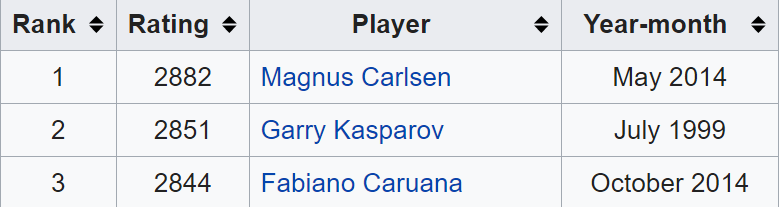

In [14]:
Image('img/helo.png')

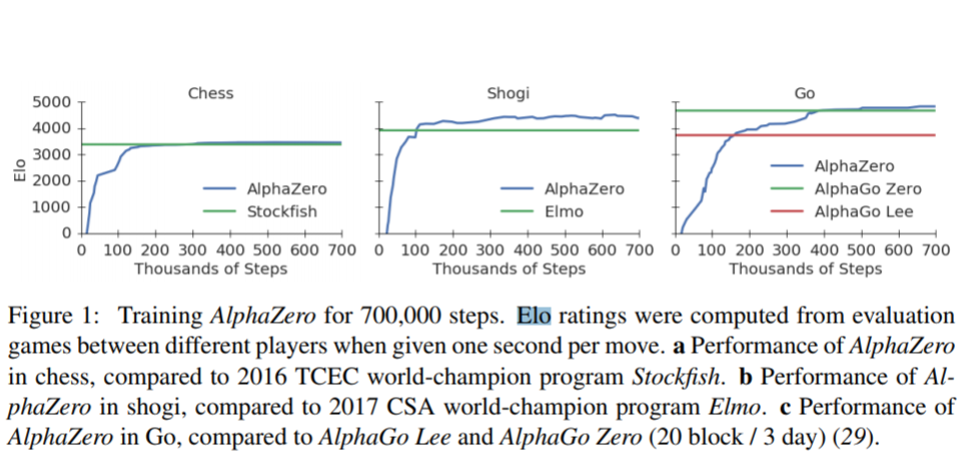

In [13]:
Image('img/elo.png')

The Elo rating is easy to compute, but it is just an algorithm, we dont know the assumptions made, and the value of K depends on cases...



## Xbox

 Jill and Fred now play Xbox. 

We now want to determine the skills of players without any prior knowledge.
 
    Warning: Perhaps an skilled player is creating a second account, or the player has experience in similar tasks.
 
 Since we know very little about a player before they play any games, this distribution needs to be broad and cover the full range of skills that a new player might have.
 

    Axiom1*. 
    Each player has a skill value, represented by a continuous variable with a broad prior distribution.

    Axiom 2.
    Each player has a performance value for each game, which varies from game to game such that the average value is equal to the skill of that player. The variation in performance, which is the same for all players, is symmetrically distributed around the mean value and is more likely to be close to the mean than to be far from the mean.

    Axiom 3.
    The player with the highest performance value wins the game.

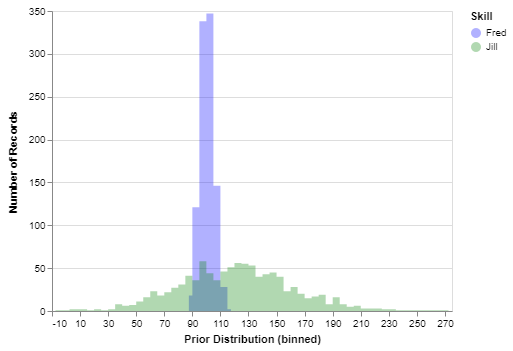

In [55]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

alt.renderers.enable('notebook')
# Generating Data
source = pd.DataFrame({'Jill': np.random.normal(120, 40, 1000),
                   'Fred': np.random.normal(100, 5, 1000)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skill',
    value_name='Prior Distribution'
)
interval = alt.selection_interval(encodings=['x'])
alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Prior Distribution', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Skill',
        scale=alt.Scale(range=['#0000ff', '#008000', '#ff0000'])
    )
).add_selection(
    interval
)

Jill is a relatively new player and so there is a lot of uncertainty in her skill whereas Fred is a more established player whose skill is more precisely known. 

Factor graph. 
        
    Choosing which variables we want to learn about: Skills, performance
    Prior probability for each variable. (Gaussian)
    
    Deterministic factor: a variable that depends on the other variables.
    



To understand the relationship of our variables lets look at the factor graph:

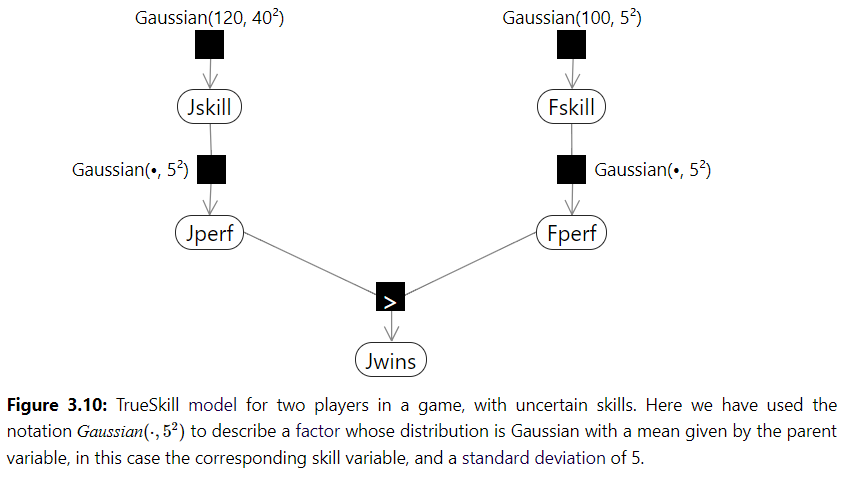

In [93]:

Image("img/TrueSkill.png")


  Once a new player has played a game, we aim to use the outcome of the game to infer the updated skill distribution for the player (and also for any other players in the game). This involves solving a probabilistic inference problem to calculate the posterior distribution of each player’s skill, taking account of the new information provided by the result of the game. 
 

    Expectation propagation.

##### Message passing algorithm. 
We walk along the graph passing the prob. distributions over the variable that the edge is connected to.
    
    1.- Each observed variable sends out a message which is a point mass distribution at the observed value.
    2.- The messages down from the prior factors are just the prior distributions themselves.
    3.- The outgoing message for any variable node is the product of the incoming messages on the other edges connected to that node.
    4.- Messages from factors to variables are computed by multiplying the incoming messages by the factor function and summing over all variables other than the one being sent to.

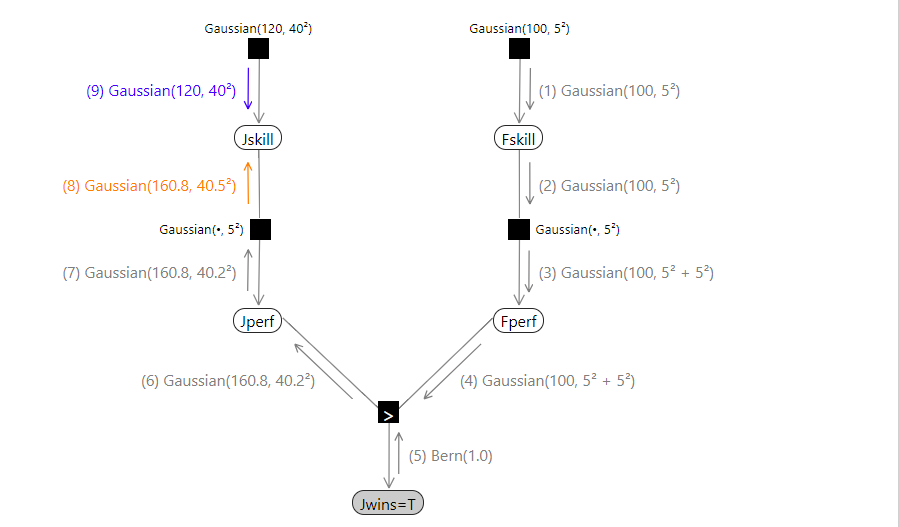

In [95]:
from IPython.display import Image
Image("img/expectation.png")

Let's study this graph carefully.  We take the GreaterThan factor, multiply by the two incoming messages (4) and (5), and then sum over Jwins and integrate over Fperf.

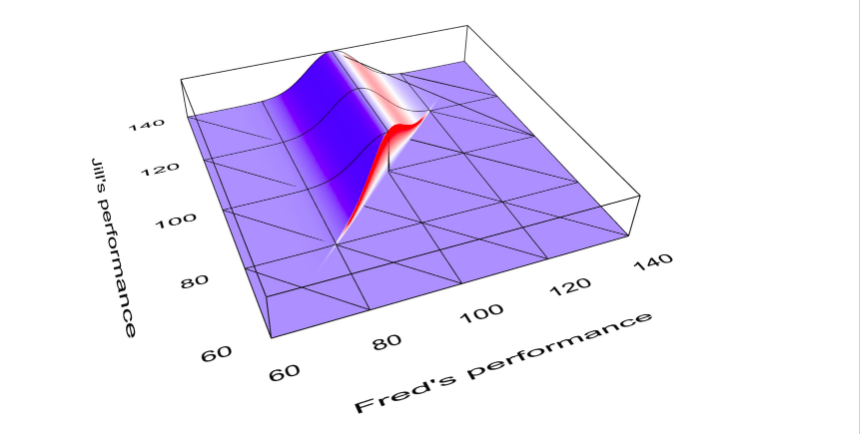

In [60]:
Image('img/inter.png')

In this case we need to take extra steps to assure we obtain a Gaussian distribution.

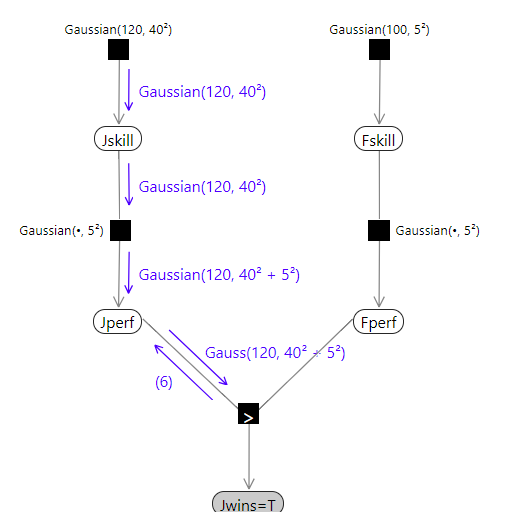

In [58]:
Image("img/m6.png")

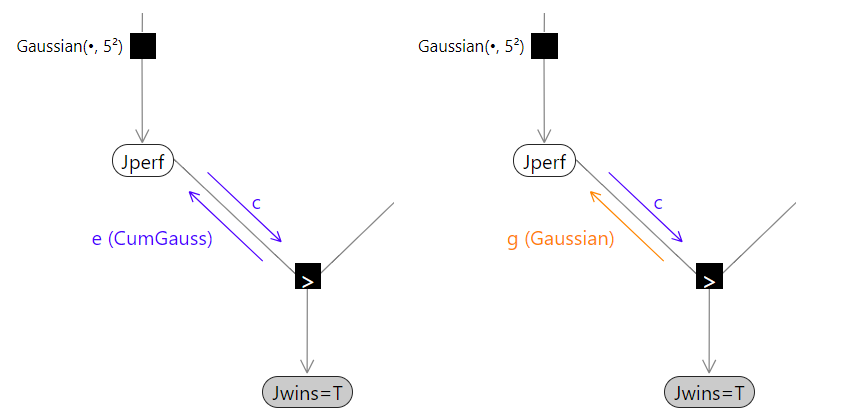

In [59]:
Image('img/goal.png')

The idea is to approximate $$ec$$ by a Gaussian, $Gaussian(ec)=gc$, then we obtain $$g=Gaussian(ec)/c.$$

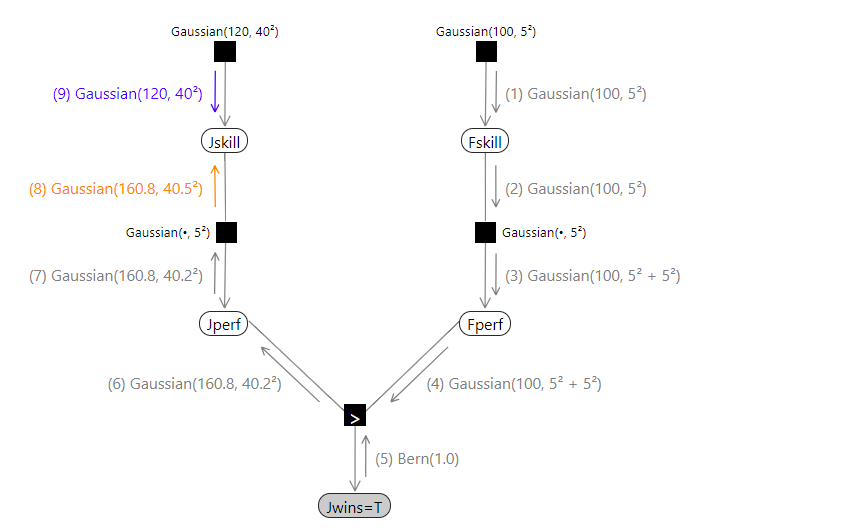

In [61]:
Image('img/final.png')

We obtain 140.1 and standard deviation 28.5.

Once we are familiar with graphs, we can use them to improve our model, for example if we are now competing as a team, we can change one of our model assumptions to:

    The performance of a team is the sum of the performances of its members, and the team with the highest performance value wins the game.

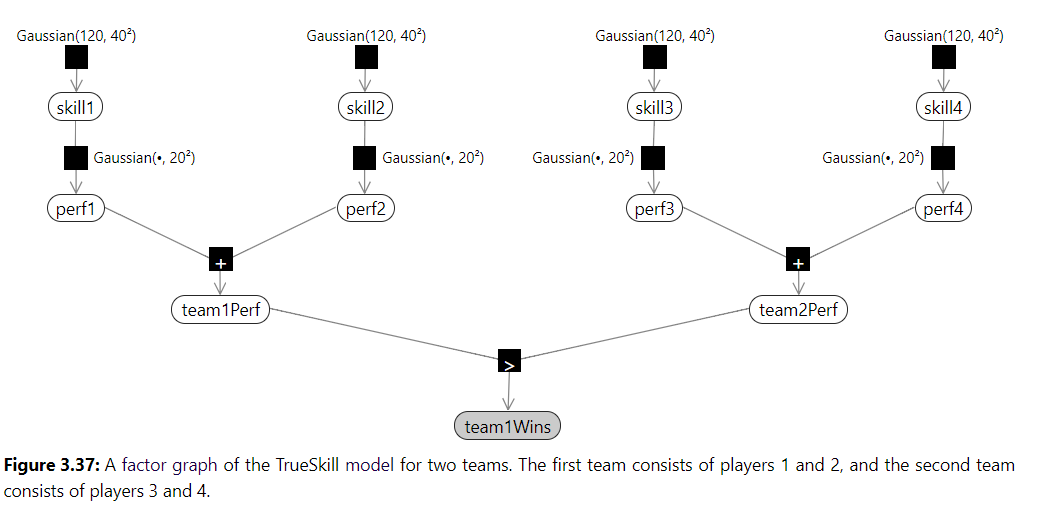

In [6]:
Image('img/teams.png')

Each player has a skill value, represented by a continuous variable, given by their skill value in their previous game plus some change in skill which has a zero-mean bell-shaped distribution.

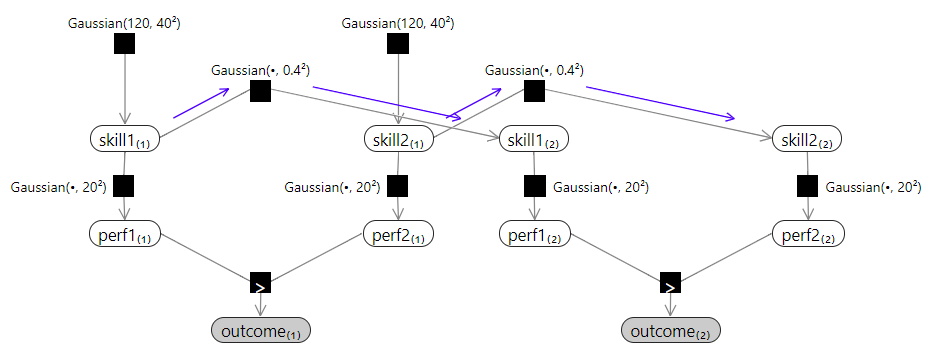

In [7]:
Image('img/time.png')

# Optional 

When we have too many players we can use Online learning: in which each player’s skill distribution gets updated only when a game outcome is obtained which involves that player. We therefore need only store the mean and variance of the Gaussian skill distribution for each player. When a player plays a new game, we run inference using this current Gaussian skill distribution as the prior, and the resulting posterior distribution is then stored and forms the prior for the next gam

Improving model assumptions:
       
    If we have several players, we modify our message-passing schedule so that we first pass messages downwards from the skill nodes to the performance nodes (as before), then we perform multiple passes back and forth amongst the performance nodes until we achieve convergence, and then finally pass messages upwards to the skill nodes in order to evaluate posterior skill marginals.
       
       
       

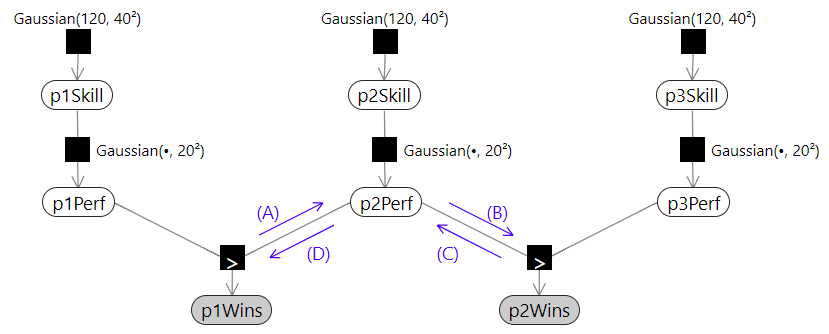

In [5]:
Image('img/morep.png')